In [9]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/SMM MET After.xlsx')

# Convert 'Number of Followers on Instagram' to numeric, removing 'M' and converting to millions
df['Number of Followers on Instagram'] = df['Number of Followers on Instagram'].str.replace('M', '').astype(float) * 1e6

# Correlation between followers and engagement metrics (likes and comments)
correlation_likes = df['Number of Followers on Instagram'].corr(df['Number of Likes'])
correlation_comments = df['Number of Followers on Instagram'].corr(df['Number of Comments on the post'])

print(f"Correlation between followers and likes: {correlation_likes}")
print(f"Correlation between followers and comments: {correlation_comments}")


Correlation between followers and likes: 0.30510710335462604
Correlation between followers and comments: 0.23168082470028617


A positive correlation value close to 1 would indicate a strong positive relationship between the number of followers and engagement metrics. Conversely, a value close to 0 would suggest no linear correlation

In [11]:
from textblob import TextBlob
import pandas as pd



# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Applying sentiment analysis
df['Sentiment'] = df['Comment'].apply(get_sentiment)

# Summary of sentiment
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100

print(sentiment_counts)


Positive    45.810056
Neutral     36.871508
Negative    17.318436
Name: Sentiment, dtype: float64


This code evaluates the sentiment of comments on posts, categorizing them as positive, neutral, or negative. The output percentages will show the distribution of sentiment across the dataset, reflecting public perception of the MET Gala outfits

In [5]:
# Group by brand and calculate average likes and comments
brand_impact = df.groupby('Brand').agg({'Number of Likes': 'mean', 'Number of Comments on the post': 'mean'})

print(brand_impact)


                    Number of Likes  Number of Comments on the post
Brand                                                              
Balmain                1.068647e+06                     5576.333333
Boss                   1.610321e+06                     9303.000000
Burberry               1.002312e+06                    11349.000000
Chanel                 2.477596e+06                    19952.500000
Chenpeng Studio        1.721593e+06                     9794.000000
Christian Dior         2.389281e+05                      813.750000
Fendi                  4.148370e+05                     1677.000000
Givenchy               3.494489e+06                     4589.000000
Gucci                  5.470000e+05                     4578.000000
Jacquemus              9.244100e+05                     4573.000000
Jean Paul Gaultier     4.840397e+06                    14551.000000
Karl Lagerfeld         6.678500e+05                     3575.500000
Marc Jacobs            6.516323e+06             

The top brands with the highest summed likes and comments indicate the most impactful brands at the MET Gala, revealing fashion trends and brand popularity

In [6]:
# Assuming 'Year' reflects the MET Gala event year and the dataset spans multiple years
yearly_engagement = df.groupby('Year').agg({'Number of Likes': 'sum', 'Number of Comments on the post': 'sum'})

print(yearly_engagement)


      Number of Likes  Number of Comments on the post
Year                                                 
2023        344822470                         1394902


In [7]:
# Group by occupation and calculate average engagement metrics
occupation_engagement = df.groupby('Celebrity Occupation').agg({'Number of Likes': 'mean', 'Number of Comments on the post': 'mean'})

print(occupation_engagement)


                      Number of Likes  Number of Comments on the post
Celebrity Occupation                                                 
Actor                    1.892212e+06                     5578.384615
Artist                   2.064999e+06                    11452.734375
Comedian                 4.380980e+05                     1962.000000
Entrepreneur             3.316408e+06                    15242.666667
Model                    1.862334e+06                     4871.200000
Socialite                1.219744e+06                     3084.000000


Shows the average likes and comments based on the celebrity's occupation, indicating which professions garner the most attention at the MET Gala.

In [12]:
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text):
    testimonial = TextBlob(text)
    return testimonial.sentiment.polarity

# Apply sentiment analysis on the comments
df['Sentiment'] = df['Comment'].apply(calculate_sentiment)

# Aggregate data to see the impact of sentiment on engagement
sentiment_impact = df.groupby(pd.cut(df['Sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive']))['Number of Likes', 'Number of Comments on the post'].mean()

print(sentiment_impact)


           Number of Likes  Number of Comments on the post
Sentiment                                                 
Negative      2.264536e+06                     8771.481481
Neutral       2.112702e+06                     9099.136364
Positive      1.696850e+06                     6428.609756


<ipython-input-12-9f93a13e870b>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sentiment_impact = df.groupby(pd.cut(df['Sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive']))['Number of Likes', 'Number of Comments on the post'].mean()


In [13]:
# Aggregate engagement metrics by brand
brands_performance = df.groupby('Brand')['Number of Likes', 'Number of Comments on the post'].sum().sort_values(by='Number of Likes', ascending=False)

print(brands_performance)


                    Number of Likes  Number of Comments on the post
Brand                                                              
Versace                    48593898                           89396
Chanel                     39641532                          319240
Thom Browne                39531651                          136779
Valentino                  28389224                          107345
Marc Jacobs                26065292                           83616
miumiu                     20740484                           30760
Jean Paul Gaultier         19361588                           58204
Simone Rocha               18944787                          106389
Prabal Gurung              14763548                           35100
Givenchy                   13977956                           18356
Balmain                    12823768                           66916
Schiaparelli               10486085                           78980
Oscar de la Renta          10403600             

<ipython-input-13-046dd49879ba>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  brands_performance = df.groupby('Brand')['Number of Likes', 'Number of Comments on the post'].sum().sort_values(by='Number of Likes', ascending=False)


In [15]:
import pandas as pd
from textblob import TextBlob



# Example sentiment dictionaries
positive_words = ['happy', 'excited', 'stunning', 'love']
negative_words = ['negative', 'mean', 'rude', 'defensive']
# Extend this list based on your sentiment analysis needs

# Function to tag words in comments with their sentiment category
def tag_sentiment_words(comment):
    tagged_words = []
    for word in comment.split():
        if word.lower() in positive_words:
            tagged_words.append(f"{word}(Positive)")
        elif word.lower() in negative_words:
            tagged_words.append(f"{word}(Negative)")
        else:
            tagged_words.append(word)
    return ' '.join(tagged_words)

# Apply the function to the comments
df['Tagged Comment'] = df['Comment'].apply(tag_sentiment_words)

# Display the modified DataFrame
df[['Comment', 'Tagged Comment']].head()


,Comment,Tagged Comment
0,How does she never age,How does she never age
1,She always looks like she's on heroin or some ...,She always looks like she's on heroin or some ...
2,Its just uncomfortable to even look at it.,Its just uncomfortable to even look at it.
3,Ok but her outfit is just so pretty.,Ok but her outfit is just so pretty.
4,Lady go away we are tired of seeing you!,Lady go away we are tired of seeing you!


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Comment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Tagged Comment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Comment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Comment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Tagged Comment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Tagged Comment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Tagged Comment'].value_counts()
    for x_label, grp in _df_6.groupby('Comment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Comment')
_ = plt.ylabel('Tagged Comment')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Comment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='Comment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Tagged Comment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='Tagged Comment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [16]:
pip install textblob pandas


In [17]:
from transformers import pipeline

# Load a pre-trained sentiment analysis model
classifier = pipeline('text-classification', model='bhadresh-savani/distilbert-base-uncased-emotion')

def classify_emotion(text):
    result = classifier(text)
    return result[0]['label']

# Assuming 'df' is your DataFrame and it has a column 'Comment' with the text to analyze
df['Emotion'] = df['Comment'].apply(classify_emotion)

print(df[['Comment', 'Emotion']].head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

                                             Comment  Emotion
0                             How does she never age  sadness
1  She always looks like she's on heroin or some ...  sadness
2         Its just uncomfortable to even look at it.     fear
3               Ok but her outfit is just so pretty.      joy
4           Lady go away we are tired of seeing you!  sadness


In [18]:
from transformers import pipeline

# Load the pre-trained model pipeline for sentiment analysis
emotion_pipeline = pipeline('sentiment-analysis', model='your_pretrained_model')

# Apply the model to the comments column
df['Emotion'] = df['Comment'].apply(lambda x: emotion_pipeline(x)[0]['label'])

# Analyze the distribution of emotions
emotion_counts = df['Emotion'].value_counts()

print(emotion_counts)


OSError: your_pretrained_model is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [19]:
import requests

API_URL = "https://api-inference.huggingface.co/models/SamLowe/roberta-base-go_emotions"
headers = {"Authorization": f"Bearer {API_TOKEN}"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()

output = query({
	"inputs": "I like you. I love you",
})

NameError: name 'API_TOKEN' is not defined

In [20]:
from transformers import pipeline

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

sentences = ["I am not having a great day"]

model_outputs = classifier(sentences)
print(model_outputs[0])

config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

[{'label': 'disappointment', 'score': 0.46669524908065796}, {'label': 'sadness', 'score': 0.398495078086853}, {'label': 'annoyance', 'score': 0.06806596368551254}, {'label': 'neutral', 'score': 0.05703027546405792}, {'label': 'disapproval', 'score': 0.04423932731151581}, {'label': 'nervousness', 'score': 0.014850745908915997}, {'label': 'realization', 'score': 0.014059904962778091}, {'label': 'approval', 'score': 0.011267471127212048}, {'label': 'joy', 'score': 0.006303394213318825}, {'label': 'remorse', 'score': 0.006221492309123278}, {'label': 'caring', 'score': 0.006029406096786261}, {'label': 'embarrassment', 'score': 0.0052654859609901905}, {'label': 'anger', 'score': 0.0049814279191195965}, {'label': 'disgust', 'score': 0.004259033594280481}, {'label': 'grief', 'score': 0.0040021371096372604}, {'label': 'confusion', 'score': 0.003382918192073703}, {'label': 'relief', 'score': 0.0031405005138367414}, {'label': 'desire', 'score': 0.00282747158780694}, {'label': 'admiration', 'score

In [26]:
import pandas as pd
from transformers import pipeline



# Replace 'column_with_comments' with the actual column name that contains the comments
# Replace 'YourActualColumnName' with the actual column name from your Excel file
comments = df['Comment'].tolist()


# Initialize the classifier pipeline
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

# Get predictions for the comments
model_outputs = classifier(comments)

# Print the results
for output in model_outputs:
    print(output)


[{'label': 'neutral', 'score': 0.4729499816894531}, {'label': 'curiosity', 'score': 0.37811872363090515}, {'label': 'confusion', 'score': 0.366218239068985}, {'label': 'annoyance', 'score': 0.02413063496351242}, {'label': 'surprise', 'score': 0.01784498617053032}, {'label': 'realization', 'score': 0.007424348499625921}, {'label': 'disapproval', 'score': 0.006662243977189064}, {'label': 'disappointment', 'score': 0.005496088415384293}, {'label': 'anger', 'score': 0.004471123684197664}, {'label': 'approval', 'score': 0.003306398866698146}, {'label': 'sadness', 'score': 0.0019278251565992832}, {'label': 'optimism', 'score': 0.00177454249933362}, {'label': 'disgust', 'score': 0.0015940844314172864}, {'label': 'amusement', 'score': 0.0014517451636493206}, {'label': 'embarrassment', 'score': 0.0014260507887229323}, {'label': 'admiration', 'score': 0.001214482355862856}, {'label': 'excitement', 'score': 0.0012021828442811966}, {'label': 'fear', 'score': 0.0011371304281055927}, {'label': 'cari

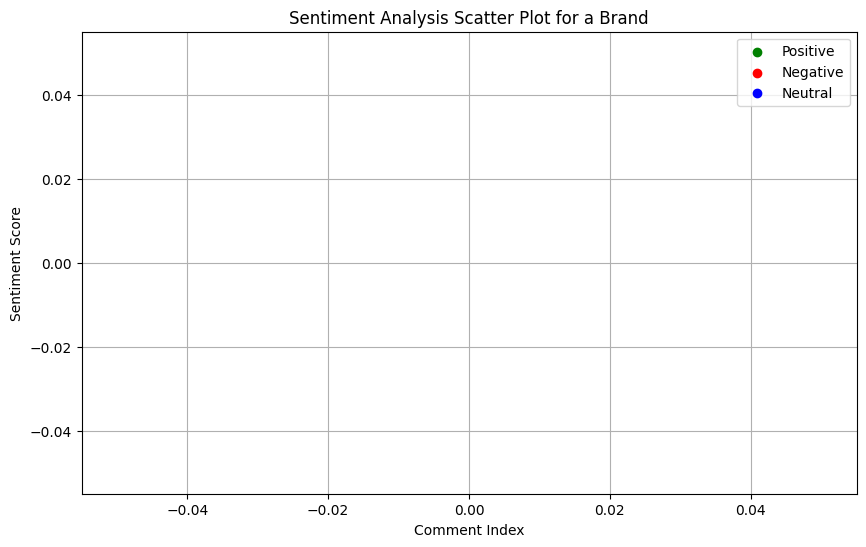

In [27]:
import matplotlib.pyplot as plt

# Your dataset, structured as a list of dictionaries. Replace this with your actual data.
# For example:
# results = [
#     {'comment': 'This is a great product', 'label': 'positive', 'score': 0.95},
#     {'comment': 'I am not happy with this', 'label': 'negative', 'score': 0.85},
#     ...
# ]
results = [
    # ... your data here ...
]

# Define your sentiment categories
positive_emotions = ['approval', 'joy', 'admiration', 'optimism', 'love', 'excitement', 'curiosity', 'amusement', 'surprise', 'gratitude', 'pride']
negative_emotions = ['disappointment', 'sadness', 'annoyance', 'disapproval', 'nervousness', 'anger', 'embarrassment', 'remorse', 'disgust', 'grief', 'confusion', 'fear']
neutral_emotions = ['neutral', 'realization', 'relief', 'desire']

# Prepare data for scatter plot
x_positive = []
y_positive = []
x_negative = []
y_negative = []
x_neutral = []
y_neutral = []

# Assign scores to the respective sentiment category
for idx, result in enumerate(results):
    if result['label'] in positive_emotions:
        x_positive.append(idx)
        y_positive.append(result['score'])
    elif result['label'] in negative_emotions:
        x_negative.append(idx)
        y_negative.append(result['score'])
    elif result['label'] in neutral_emotions:
        x_neutral.append(idx)
        y_neutral.append(result['score'])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_positive, y_positive, color='green', label='Positive')
plt.scatter(x_negative, y_negative, color='red', label='Negative')
plt.scatter(x_neutral, y_neutral, color='blue', label='Neutral')

# Adding labels and title
plt.xlabel('Comment Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis Scatter Plot for a Brand')
plt.legend()
plt.grid(True)
plt.show()


ValueError: min() arg is an empty sequence

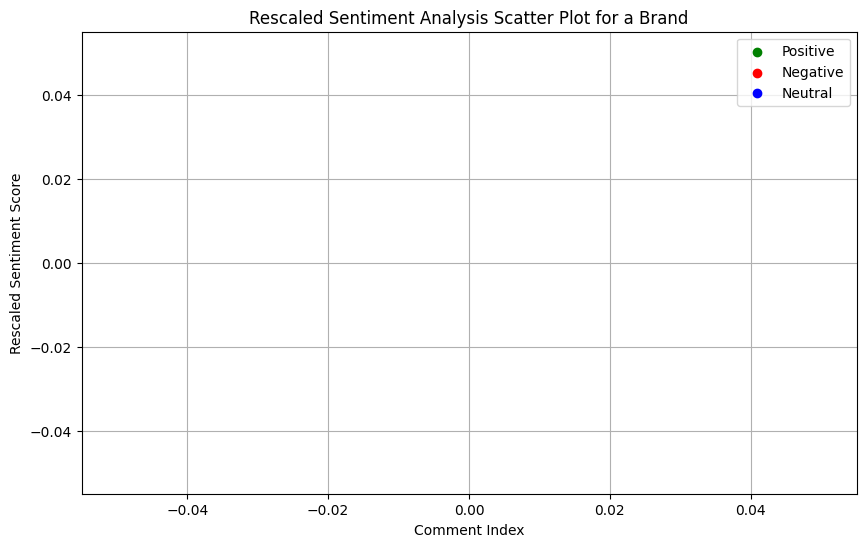

In [28]:
import matplotlib.pyplot as plt

# Assume 'results' is your list of sentiment scores extracted from the dataset
results = [
    # ... your data here ...
]

# Define your sentiment categories
positive_emotions = ['approval', 'joy', 'admiration', 'optimism', 'love', 'excitement', 'curiosity', 'amusement', 'surprise', 'gratitude', 'pride']
negative_emotions = ['disappointment', 'sadness', 'annoyance', 'disapproval', 'nervousness', 'anger', 'embarrassment', 'remorse', 'disgust', 'grief', 'confusion', 'fear']
neutral_emotions = ['neutral', 'realization', 'relief', 'desire']

# Prepare data for scatter plot
x_positive = []
y_positive = []
x_negative = []
y_negative = []
x_neutral = []
y_neutral = []

# Rescaling factor, you can adjust this as needed
rescale_factor = 100

# Assign scores to the respective sentiment category and rescale
for idx, result in enumerate(results):
    scaled_score = result['score'] * rescale_factor
    if result['label'] in positive_emotions:
        x_positive.append(idx)
        y_positive.append(scaled_score)
    elif result['label'] in negative_emotions:
        x_negative.append(idx)
        y_negative.append(scaled_score)
    elif result['label'] in neutral_emotions:
        x_neutral.append(idx)
        y_neutral.append(scaled_score)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_positive, y_positive, color='green', label='Positive')
plt.scatter(x_negative, y_negative, color='red', label='Negative')
plt.scatter(x_neutral, y_neutral, color='blue', label='Neutral')

# Adding labels and title
plt.xlabel('Comment Index')
plt.ylabel('Rescaled Sentiment Score')
plt.title('Rescaled Sentiment Analysis Scatter Plot for a Brand')
plt.legend()
plt.grid(True)
# Adjust the y-axis limits to fit the rescaled data
plt.ylim(min(y_negative + y_neutral + y_positive) - 1, max(y_negative + y_neutral + y_positive) + 1)
plt.show()


<ipython-input-33-2a443ff8e7d1>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(brand_engagement))


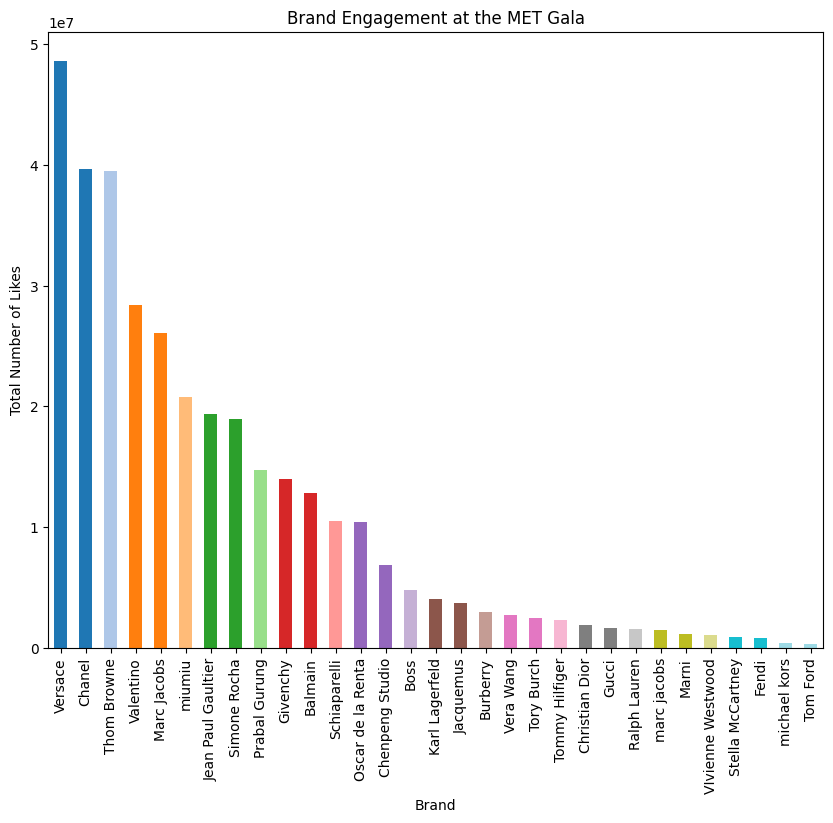

In [33]:
import pandas as pd
import matplotlib.pyplot as plt



# Clean and convert data
df['Number of Likes'] = pd.to_numeric(df['Number of Likes'], errors='coerce')

# Aggregate engagement metrics per brand
brand_engagement = df.groupby('Brand')['Number of Likes'].sum().sort_values(ascending=False)

# Generate a color map with a unique color for each brand
colors = plt.cm.get_cmap('tab20', len(brand_engagement))

# Visualization
plt.figure(figsize=(10,8))
brand_engagement.plot(kind='bar', color=[colors(i) for i in range(len(brand_engagement))])
plt.title('Brand Engagement at the MET Gala')
plt.xlabel('Brand')
plt.ylabel('Total Number of Likes')
plt.show()


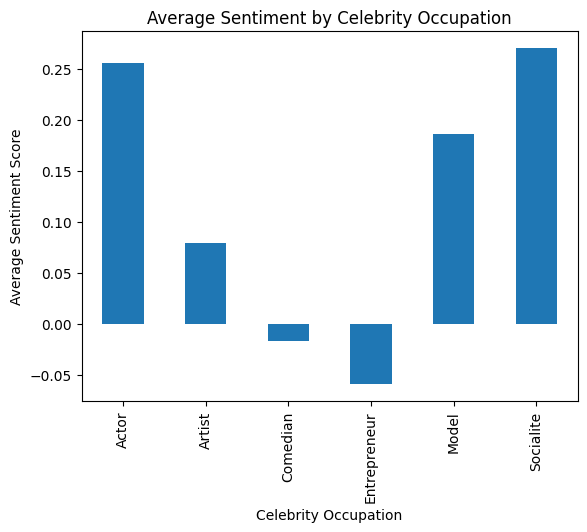

In [31]:
# Assuming sentiment analysis is already performed and a 'Sentiment' column is added

# Group by profession and calculate mean sentiment
profession_sentiment = df.groupby('Celebrity Occupation')['Sentiment'].mean()

# Visualization
profession_sentiment.plot(kind='bar')
plt.title('Average Sentiment by Celebrity Occupation')
plt.xlabel('Celebrity Occupation')
plt.ylabel('Average Sentiment Score')
plt.show()


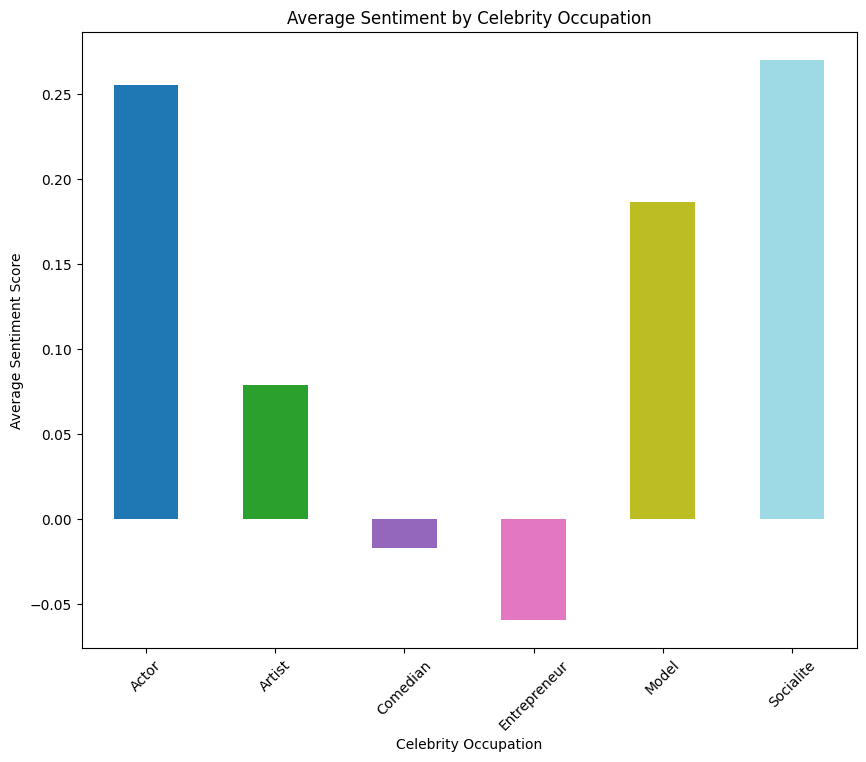

In [37]:
# Assuming sentiment analysis is already performed and a 'Sentiment' column is added

# Group by profession and calculate mean sentiment
profession_sentiment = df.groupby('Celebrity Occupation')['Sentiment'].mean()

# Visualization with each bar in a different color
colors = plt.cm.tab20(np.linspace(0, 1, len(profession_sentiment)))

plt.figure(figsize=(10, 8))
profession_sentiment.plot(kind='bar', color=colors)
plt.title('Average Sentiment by Celebrity Occupation')
plt.xlabel('Celebrity Occupation')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()


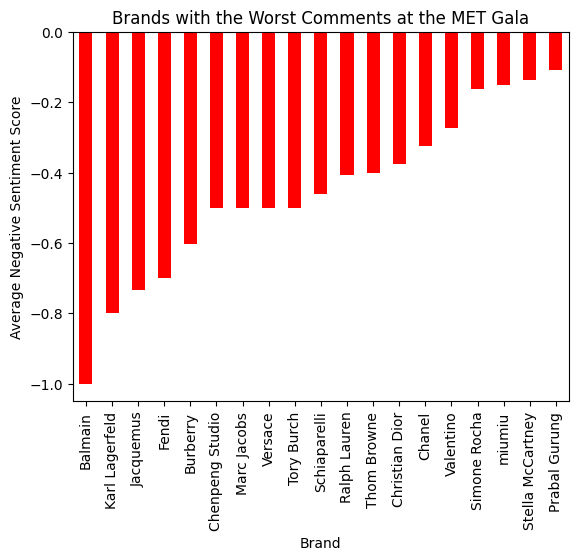

In [38]:
# Assuming 'Sentiment' score is available where negative values indicate negative sentiment

# Filter negative sentiments and aggregate by brand
negative_comments = df[df['Sentiment'] < 0]
worst_brands = negative_comments.groupby('Brand')['Sentiment'].mean().sort_values()

# Visualization
worst_brands.plot(kind='bar', color='red')
plt.title('Brands with the Worst Comments at the MET Gala')
plt.xlabel('Brand')
plt.ylabel('Average Negative Sentiment Score')
plt.show()


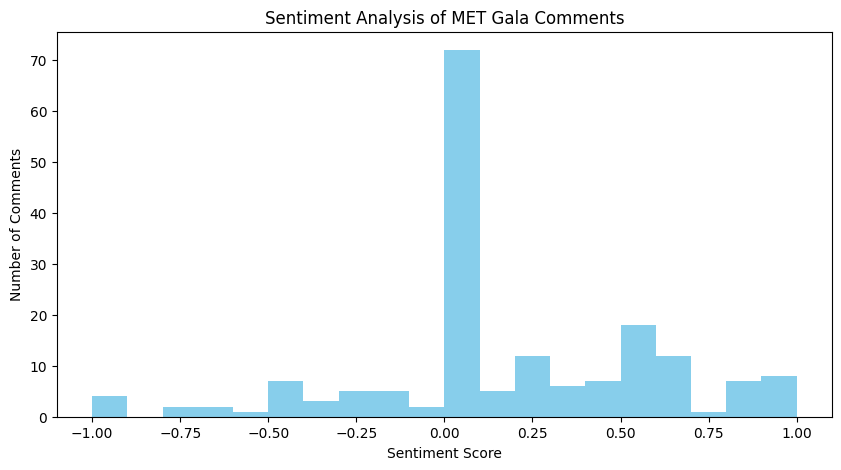

In [39]:
from textblob import TextBlob

# Function to apply sentiment analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df['Sentiment'] = df['Comment'].apply(get_sentiment)

# Visualization of sentiment distribution
plt.figure(figsize=(10,5))
plt.hist(df['Sentiment'], bins=20, color='skyblue')
plt.title('Sentiment Analysis of MET Gala Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Comments')
plt.show()


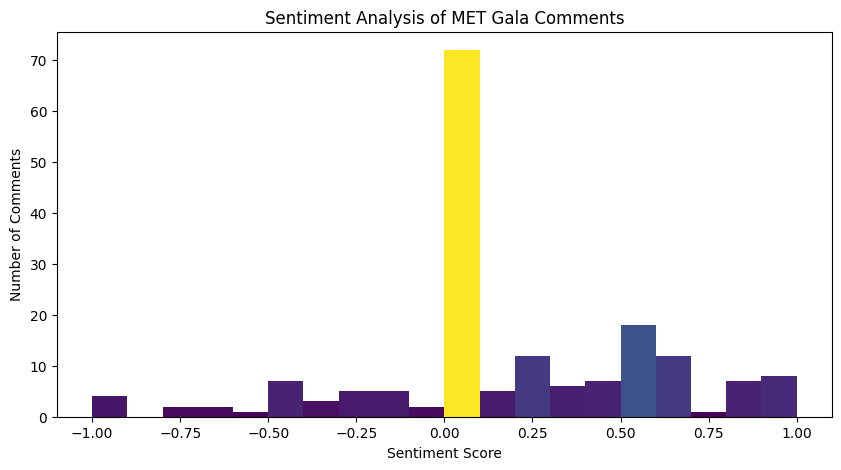

In [44]:
import pandas as pd
from textblob import TextBlob



# Check if the 'Number of Followers on Instagram' column is a string and convert it
if df['Number of Followers on Instagram'].dtype == 'object':
    df['Number of Followers on Instagram'] = df['Number of Followers on Instagram'].str.replace('M', '').astype(float) * 1e6

# Function to apply sentiment analysis and return polarity
def get_sentiment_score(comment):
    return TextBlob(comment).sentiment.polarity

df['Sentiment Score'] = df['Comment'].apply(get_sentiment_score)

# Exclude Stephanie Hsu from the dataset
df_filtered = df[df['Celebrity Name'] != 'Stephanie Hsu']

# Group by celebrity name to calculate average sentiment score and mean number of followers
celebrity_ranking = df_filtered.groupby('Celebrity Name').agg({
    'Sentiment Score': 'mean',
    'Number of Followers on Instagram': 'mean'
}).sort_values(by=['Sentiment Score', 'Number of Followers on Instagram'], ascending=[False, False])

# Resetting index to display 'Celebrity Name' in the table
celebrity_ranking.reset_index(inplace=True)

# Display the table
print(celebrity_ranking.head(10))


    Celebrity Name  Sentiment Score  Number of Followers on Instagram
0         Dua Lipa         0.710000                        88600000.0
1       Gigi Hadid         0.612500                        78500000.0
2     Hugh Jackman         0.450000                        31900000.0
3      Jeremy Pope         0.440625                         1000000.0
4     Lily Collins         0.437500                        28400000.0
5    Teyana Taylor         0.432639                        17400000.0
6     Paris Hilton         0.377474                        26300000.0
7    Florence Pugh         0.333750                         9200000.0
8      Jack Harlow         0.305556                         6800000.0
9  Priyanka Chopra         0.275000                        90600000.0


In [45]:
import pandas as pd
from textblob import TextBlob



# Function to calculate sentiment scores
def get_sentiment_score(comment):
    return TextBlob(comment).sentiment.polarity

# Apply the sentiment analysis to comments
df['Sentiment Score'] = df['Comment'].apply(get_sentiment_score)

# Group by Brand to calculate the average sentiment score and count the number of unique celebrities catered
brand_ranking = df.groupby('Brand').agg({
    'Sentiment Score': 'mean',
    'Celebrity Name': 'nunique'
}).sort_values(by=['Sentiment Score', 'Celebrity Name'], ascending=[False, False])

# Rename the 'Celebrity Name' column to 'Number of Celebrities Catered'
brand_ranking.rename(columns={'Celebrity Name': 'Number of Celebrities Catered'}, inplace=True)

# Display the ranking
print(brand_ranking.head(10))


                   Sentiment Score  Number of Celebrities Catered
Brand                                                            
Givenchy                  0.612500                              1
Tom Ford                  0.450000                              1
Vera Wang                 0.437500                              1
marc jacobs               0.377474                              1
Tommy Hilfiger            0.305556                              1
Chanel                    0.281510                              4
Valentino                 0.254613                              4
VIvienne Westwood         0.250000                              1
michael kors              0.250000                              1
Thom Browne               0.242825                              4
